In [26]:
from biocrnpyler import *
import pandas as pd
import pylab as plt
import numpy as np
from bokeh.layouts import row

import warnings
import bokeh.io
import bokeh.plotting

## Reactions ##

1) dA1 + Core2 ---> rO2 + dA1:Core2(transcription)
rate: k_beta

2) rO2 + DFHBI ---> rO2:DHBI (broccoli aptamer complete)
rate: k_gamma

3) dA1:Core2 + rR1 ---> dA1:rR1 + Core2 (displacement)
rate: k_D

In [51]:

# Define species of Produce2N
dA1 = Species (name = "dA1", material_type = "dna")
rR1 = Species (name = "rR1", material_type = "rna")
Core2 = Species (name = "Core2")
rO2 = Species (name = "rO2", material_type = "rna")
DFHBI = Species (name = "DFHBI")

# Define binding rates
# Currently unrealistic
beta = 9.96e-2
gamma = 1

# Reaction 1 Transcription
rxn1 = Reaction([dA1,Core2], [rO2, ComplexSpecies([dA1,Core2])], k = beta)
# Broccoli Aptamer complete
rxn2 = Reaction([rO2, DFHBI], [ComplexSpecies([rO2,DFHBI], name="BrocApt")], k = gamma)
CRN_Prod2 = ChemicalReactionNetwork(species = [dA1,Core2,rO2,DFHBI], reactions = [rxn1,rxn2])
#Species, reactions, and CRNs can all be directly printed
print('CRN for the Produce 2N genelet with non-massaction propensities:\n',CRN_Prod2)

CRN for the Produce 2N genelet with non-massaction propensities:
 Species = dna_dA1, Core2, rna_rO2, DFHBI
Reactions = [
	dna_dA1 + Core2 --> rna_rO2 + complex_Core2_dna_dA1        massaction: k_f(dna_dA1,Core2)=0.0996*dna_dA1*Core2
	rna_rO2 + DFHBI --> complex_BrocApt        massaction: k_f(rna_rO2,DFHBI)=1*rna_rO2*DFHBI
]


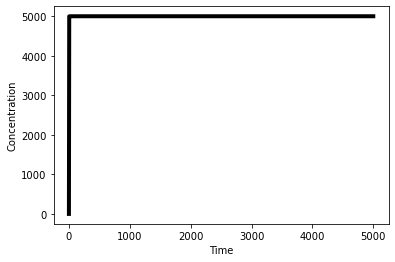

In [52]:
# Plotting above reaction
timepoints = np.linspace(0, 5000, 1000)
plt.figure()
R = CRN_Prod2.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = {"dna_dA1":5000, "Core2":5000})
plt.plot(timepoints, R["rna_rO2"], color = 'black', lw = 4)
# plt.title('Concentration Trajectory Dynamics')
plt.xlabel("Time")
plt.ylabel("Concentration");
plt.show()

In [53]:
# BioSCRAPE simulation of Produce2N
io = {"dna_dA1": 5000, "Core2":5000, "DFHBI":6000}

timepoints = np.linspace(0, 5000, 1000)
R = CRN_Prod2.simulate_with_bioscrape(timepoints, initial_condition_dict = io)

bokeh.io.output_notebook()
p = bokeh.plotting.figure(plot_width = 300, plot_height = 300)
p.circle(timepoints, R["complex_BrocApt"], legend_label = "Broccoli Apt", color = "orange")
p.legend.click_policy="hide"

bokeh.io.show(row (p))

C:\Users\Jeremiah\anaconda3\lib\site-packages\biocrnpyler-0.2.1-py3.7.egg\biocrnpyler\chemical_reaction_network.py:1089: UserWarning: The following species are uninitialized and their value has been defaulted to 0: complex_Core2_dna_dA1, complex_BrocApt, 
C:\Users\Jeremiah\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
odeint failed with mxstep=500...

Loading BokehJS ...